## Introduction

[Github link to our project](https://github.com/HMy2912/P4DS-FinalProj)

Members in this final project:

- 19127216 - Đặng Hoàn Mỹ
- 19127503 - Ngô Quốc Phát

Inspiring from our teacher sharing in the last day of the lecture `Programming for Data Science` about how we can try to go through *bad times*, we decide to look for a topic related to. Moreover, we are expecting to see a positive vibe in tech industry around the world about the mental health problems.

## Library

Import neccessary library for this file.

In [1]:
import sys
sys.executable

'C:\\Users\\QuocPhat\\anaconda3\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

## Data Collection

    1. Objectives and Ideas

As sharing before, we decided to find the dataset about the mental health problems, especially in technology field. We found this whilst going on [Kaggle.com](kaggle.com) which is a popular website with lots of useful dataset to start working.

    2. Sources

In the title, *[OSMI Mental Health in Tech Survey 2016](https://www.kaggle.com/osmi/mental-health-in-tech-2016)* \
**Data on prevalence and attitudes towards mental health among tech workers**

    3. License

The dataset gets the License CC BY-SA 4.0 for:
- Share — copy and redistribute the material in any medium or format.
- Adapt — remix, transform, and build upon the material for any purpose, even commercially

    4. Origin

This is the survey which has over 1400 responses.

>"Currently over 1400 responses, the ongoing 2016 survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers."

> "We are interested in gauging how mental health is viewed within the tech/IT workplace, and the prevalence of certain mental health disorders within the tech industry. The Open Sourcing Mental Illness team of volunteers will use this data to drive our work in raising awareness and improving conditions for those with mental health disorders in the IT workplace."

## Exploring Data

We will need to check briefly what is in the dataset that we collected.

In [3]:
mh_df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
mh_df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


We need to change the column name. There are a lots columns in this dataset, we will rename the columns and in the preprocessing steps, we will delete some columns for easy to keep track.

In [4]:
old_cols = list(mh_df.columns)
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']
mh_df.columns = renamed_columns

### How many rows and columns in the dataset?

We can see that there are 1433 rows but 63 columns.

In [5]:
num_rows, num_cols = len(mh_df), len(mh_df.columns)
num_rows, num_cols

(1433, 63)

### What is the meaning of each row?

Each row presents for each respondents about their opinion/ experiences with mental health problems.

In [6]:
mh_df.head()

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


### Are there duplicated rows?

Fortunately, there is NO duplicated rows in the dataset.

In [7]:
dups_count = mh_df.duplicated(keep='first').sum()
dups_count != 0

False

### What is the meaning of each column?

Each column is one question in the survey. Before we rename it, we keep the `old_cols` - old names' columns to list out in this section.

In [8]:
meaning_cols = pd.DataFrame({'meaning': old_cols}).set_index(pd.Series(renamed_columns))
meaning_cols

,meaning
self_empl_flag,Are you self-employed?
comp_no_empl,How many employees does your company or organi...
tech_comp_flag,Is your employer primarily a tech company/orga...
tech_role_flag,Is your primary role within your company relat...
mh_coverage_flag,Does your employer provide mental health benef...
...,...
live_us_teritory,What US state or territory do you live in?
country_work,What country do you work in?
work_us_teritory,What US state or territory do you work in?
work_position,Which of the following best describes your wor...


### What is the current data type of each column?
### Are there columns having inappropriate data types?

Most of them have approriate data types but there are some exceptions which will be listed in the preprocessing steps.

In [9]:
col_dtypes = pd.Series(mh_df.dtypes)
col_dtypes

self_empl_flag        int64
comp_no_empl         object
tech_comp_flag      float64
tech_role_flag      float64
mh_coverage_flag     object
                     ...   
live_us_teritory     object
country_work         object
work_us_teritory     object
work_position        object
remote_flag          object
Length: 63, dtype: object

### What is the percentage of missing values?

The percentage of missing values of each column are calculated and saved in a DataFrame.

In [10]:
percent_missing = mh_df.isnull().sum() * 100 / len(mh_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
self_empl_flag,0.000000
comp_no_empl,20.027913
tech_comp_flag,20.027913
tech_role_flag,81.646895
mh_coverage_flag,20.027913
...,...
live_us_teritory,41.381717
country_work,0.000000
work_us_teritory,40.614096
work_position,0.000000


### With each numerical column, how are values distributed?
* Min? max? Are they abnormal?

Only the `age` column is the numerical, and 6 other columns below are about just 0, 1 (int64) so it should be categorical, not numerical.

In [11]:
col_dtypes = pd.DataFrame({'type': mh_df.dtypes})

In [12]:
col_dtypes.index[col_dtypes['type'] == 'int64'].tolist(), col_dtypes.index[col_dtypes['type'] == 'float64'].tolist()

(['self_empl_flag', 'prev_employers_flag', 'mh_sought_proffes_treatm', 'age'],
 ['tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag2'])

<AxesSubplot:xlabel='mh_coverage_flag2', ylabel='count'>

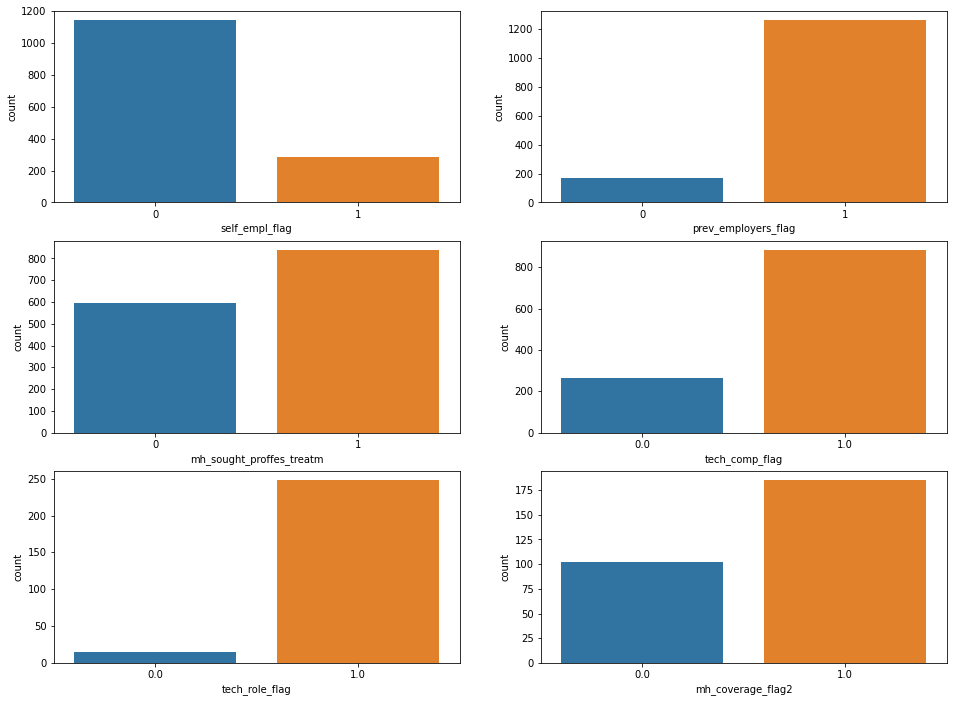

In [13]:
fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=3)
sns.countplot(x="self_empl_flag", data=mh_df, ax=ax[0][0])
sns.countplot(x="prev_employers_flag", data=mh_df, ax=ax[0][1])
sns.countplot(x="mh_sought_proffes_treatm", data=mh_df, ax=ax[1][0])
sns.countplot(x="tech_comp_flag", data=mh_df, ax=ax[1][1])
sns.countplot(x="tech_role_flag", data=mh_df, ax=ax[2][0])
sns.countplot(x="mh_coverage_flag2", data=mh_df, ax=ax[2][1])

<AxesSubplot:xlabel='age', ylabel='count'>

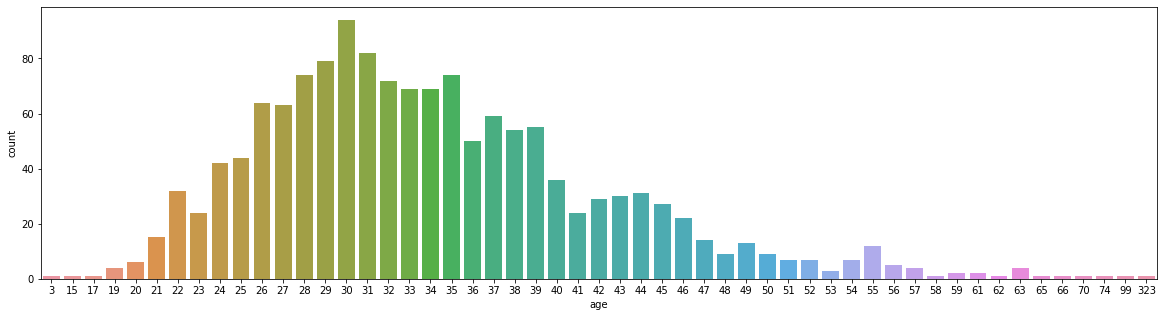

In [14]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.countplot(x="age", data=mh_df)

The `tech_role_flag` has a lot of missing values and we need to focus in the tech area so we can eliminate rows which is not belong to tech group.

The `age` column is abnormal because there are some outliers, we can see that `age` got min value - 3 and max value - 323.

### With each categorical column, how are values distributed?
* How many different values? Are they abnormal?

The `sex` column is normally around 3 values but in this dataset, the `sex` column have lots of different values, so we need to notice in further steps.

In [15]:
print('Unique values count: ', len(set(mh_df['sex'])))
print('Some values: ', list(set(mh_df['sex']))[:10])

Unique values count:  71
Some values:  ['Female assigned at birth ', nan, 'Cisgender Female', 'Fluid', 'mail', 'Male ', 'Human', 'Female or Multi-Gender Femme', 'M|', 'Queer']


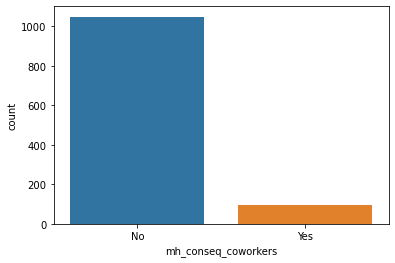

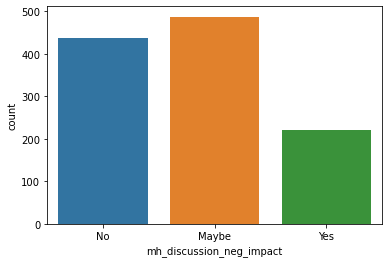

In [16]:
sns.countplot(x="mh_conseq_coworkers", data=mh_df)
plt.show()
sns.countplot(x="mh_discussion_neg_impact", data=mh_df)
plt.show()

## Preprocessing

- Recode `sex` column.

There are 70 unique genders, which is because participants are allowed to enter their gender freely. I did my best to group the genders while respecting the participants' answers to the best of my ability.

In [17]:
mh_df['sex'] = mh_df['sex'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
mh_df['sex'] = mh_df['sex'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
mh_df['sex'] = mh_df['sex'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

# replace the one null with Male, the mode gender, so we don't have to drop the row
mh_df['sex'] = mh_df['sex'].replace(np.NaN, 'Male')
mh_df['sex'].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

- Define `tech_role_flag` again because there are a lot missing values.

In [18]:
tech_list = mh_df[mh_df['work_position'].str.contains('Dev')]['work_position'].tolist()

mh_df['tech_role_flag'] = mh_df['work_position']
mh_df['tech_role_flag'].replace(to_replace = tech_list, value = 1, inplace = True)

remain_list = mh_df['tech_role_flag'].unique()[1:].tolist()
mh_df['tech_role_flag'].replace(to_replace = remain_list, value = 0, inplace = True)

In [19]:
mh_df['tech_role_flag'].isnull().sum()

0

- Delete inapproriate values in `age` column.

In [20]:
mean_age = int(mh_df[(mh_df['age'] >= 18) | (mh_df['age'] <= 75)]['age'].mean())
mh_df['age'].replace(to_replace = mh_df[(mh_df['age'] < 18) | (mh_df['age'] > 75)]['age'].tolist(), 
                     value = mean_age, inplace = True)

<AxesSubplot:xlabel='age', ylabel='count'>

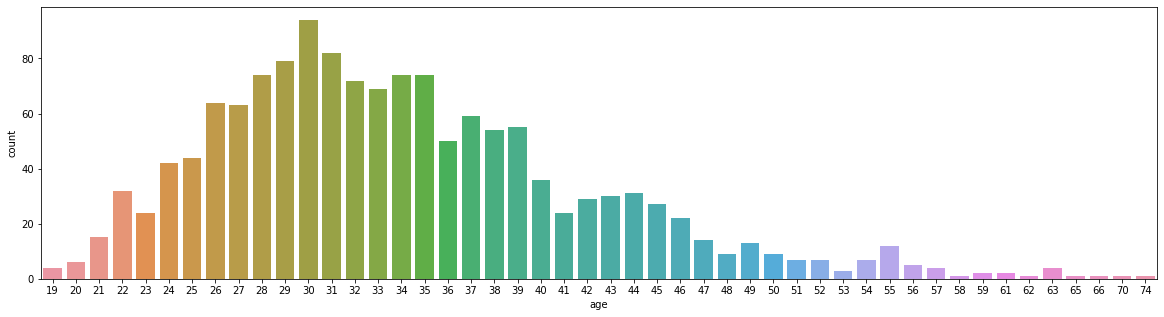

In [21]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.countplot(x="age", data=mh_df)

- Delete rows when there are >= 50% missing values in each.

In [22]:
cols = (mh_df.isna().sum() >= mh_df.shape[0]/2).tolist()
to_drop = mh_df.columns[cols]
mh_df.drop(labels = to_drop, axis = 1, inplace = True)

In [23]:
len(mh_df.columns)

51

- Fill missing values in other columns.

In [24]:
# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(mh_df)
imp_data = pd.DataFrame(data = imp.transform(mh_df), columns = mh_df.columns)
mh_df = imp_data

- Drop columns not related to the questions.

In [25]:
use_cols = ['mh_hurt_on_career', 'sex', 'age', 'self_empl_flag', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag', 'mh_resources_provided', 'mh_medical_leave', 'mh_eq_ph_employer', 'mh_disorder_current', 'mh_discussion_neg_impact', 'mh_discussion_cowork', 'mh_neg_view_cowork', 'mh_discussion_supervis', 'mh_sharing_friends/fam_flag']
not_use_cols = [col for col in mh_df if col not in use_cols]

mh_df.drop(not_use_cols, axis=1, inplace=True)
mh_df

,self_empl_flag,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_resources_provided,mh_medical_leave,mh_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_disorder_current,age,sex
0,0,1.0,1,Not eligible for coverage / N/A,No,Very easy,No,Maybe,Yes,I don't know,Maybe,"No, I don't think they would",Somewhat open,No,39,Male
1,0,1.0,1,No,Yes,Somewhat easy,No,Maybe,Yes,Yes,"No, I don't think it would","No, I don't think they would",Somewhat open,Yes,29,Male
2,0,1.0,1,No,No,Neither easy nor difficult,Maybe,Maybe,Maybe,I don't know,Maybe,Maybe,Somewhat open,No,38,Male
3,1,1.0,0,Yes,No,Somewhat easy,Maybe,Maybe,Yes,I don't know,"Yes, I think it would",Maybe,Neutral,Yes,43,Male
4,0,0.0,1,Yes,No,Neither easy nor difficult,Yes,Maybe,No,No,"Yes, I think it would",Maybe,Somewhat open,Yes,43,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,1.0,0,Yes,No,Somewhat easy,Maybe,Maybe,Yes,I don't know,Maybe,Maybe,Somewhat open,No,34,Female
1429,1,1.0,0,Yes,No,Somewhat easy,Maybe,Maybe,Yes,I don't know,"No, it has not","Yes, I think they would",Somewhat not open,No,56,Male
1430,0,1.0,1,Yes,Yes,Somewhat difficult,Maybe,Yes,Yes,I don't know,"Yes, it has","No, I don't think they would",Somewhat open,Maybe,52,Male
1431,0,0.0,1,I don't know,Yes,Somewhat difficult,Maybe,Maybe,Yes,No,"No, I don't think it would","No, I don't think they would",Somewhat open,Yes,30,Female


## Questions

*What is the question? What are benefits of finding the answer?*

In [26]:
data_tech = mh_df[mh_df['tech_role_flag']==1]
data_non_tech = mh_df[mh_df['tech_role_flag']==0]

In [27]:
colors = sns.color_palette('pastel')[0:6]

***1. Is having mental health issues harmful to someone's career?***

- The majority of survey respondents believe that being identified as a person with a mental health problem will harm their career.
- This shows that a lot of people have an understanding of mental health, a lot of people think it's really bad for their work. But, there are also some people who disagree with that and say that it doesn't in fact harm their career.
- Based on the graph, we can see that the percentage of women who choose "Yes" is more than the percentage of men who choose "yes", so it is possible that women feel the harmful effects of mental health more than men.

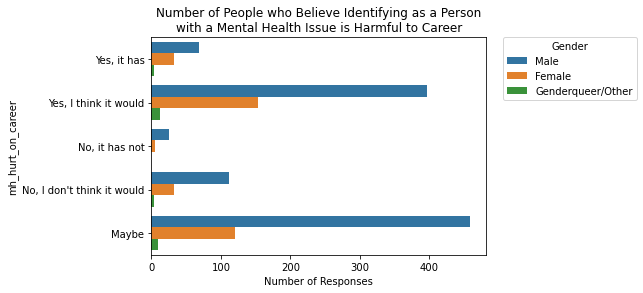

In [28]:
g = sns.countplot(y='mh_hurt_on_career', hue='sex', data=mh_df, 
                  order=['Yes, it has', 'Yes, I think it would',
                        'No, it has not', "No, I don't think it would", 'Maybe'])
plt.title('Number of People who Believe Identifying as a Person\nwith a Mental Health Issue is Harmful to Career')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
plt.xlabel('Number of Responses')
plt.show()

***2. Given a person's knowledge of his/ her own mental health, what kind of company should he/ she work at to be comfortable when asking help?***

- About 3/4 of the survey respondents work in a technology company or have a tech role in a non-tech company.
- So the majority of participants are in the technology sector. So we only consider 2 types of companies that are tech company and non-tech campany

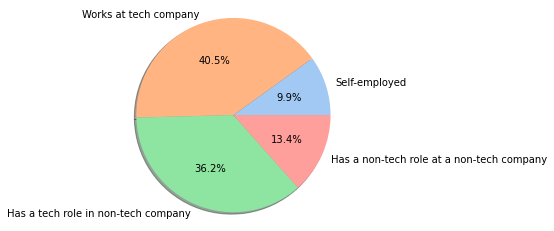

In [29]:
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [mh_df['self_empl_flag'].value_counts()[1],
         mh_df['tech_comp_flag'].value_counts()[1],
         mh_df['tech_role_flag'].value_counts()[1],
         mh_df['tech_role_flag'].value_counts()[0]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

To compare both companies, we use questions that relate employers to their employees of each type of company.
- Does your employer offer resources to learn more about mental health concerns and options for seeking help?
- If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
- Do you feel that your employer takes mental health as seriously as physical health?
- Does your employer provide mental health benefits as part of healthcare coverage?

In [30]:
def get_sizes_1(data):
    all_ = data['mh_coverage_flag'].count()
    no_ = data[data['mh_coverage_flag'] == 'No']['mh_coverage_flag'].count()
    yes_ = data[data['mh_coverage_flag'] == 'Yes']['mh_coverage_flag'].count()
    not_know_ = data[data['mh_coverage_flag'] == "I don't know"]['mh_coverage_flag'].count()
    not_elig_ = data[data['mh_coverage_flag'] == 'Not eligible for coverage / N/A']['mh_coverage_flag'].count()
    return [no_/all_, yes_/all_, not_know_/all_, not_elig_/all_]

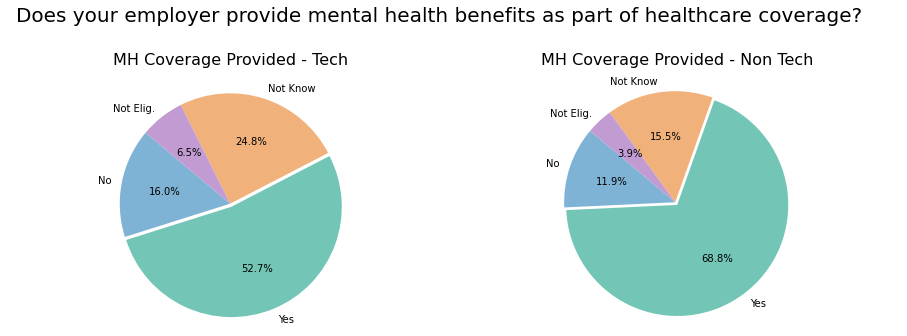

In [45]:
fig, ax = plt.subplots(figsize = (16, 10), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Does your employer provide mental health benefits as part of healthcare coverage?', fontsize = 20, y = 1)

labels = 'No', 'Yes', 'Not Know', 'Not Elig.'
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
explode = (0, 0.03, 0, 0)

ax[0][0].pie(get_sizes_1(data_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('MH Coverage Provided - Tech', pad = 14, fontsize = 16)

ax[0][1].pie(get_sizes_1(data_non_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('MH Coverage Provided - Non Tech', pad = 14, fontsize = 16)
fig.delaxes(ax[1][0])
fig.delaxes(ax[1][1])

According to the chart above, both types of companies offer health benefits as part of a health protection system. But the percentage of offered employees of non-tech company is more than tech company

In [32]:
def get_sizes_2(data):
    all_ = data['mh_resources_provided'].count()
    no_ = data[data['mh_resources_provided'] == 'No']['mh_resources_provided'].count()
    yes_ = data[data['mh_resources_provided'] == 'Yes']['mh_resources_provided'].count()
    not_know_ = data[data['mh_resources_provided'] == "I don't know"]['mh_resources_provided'].count()
    return [no_/all_, yes_/all_, not_know_/all_]

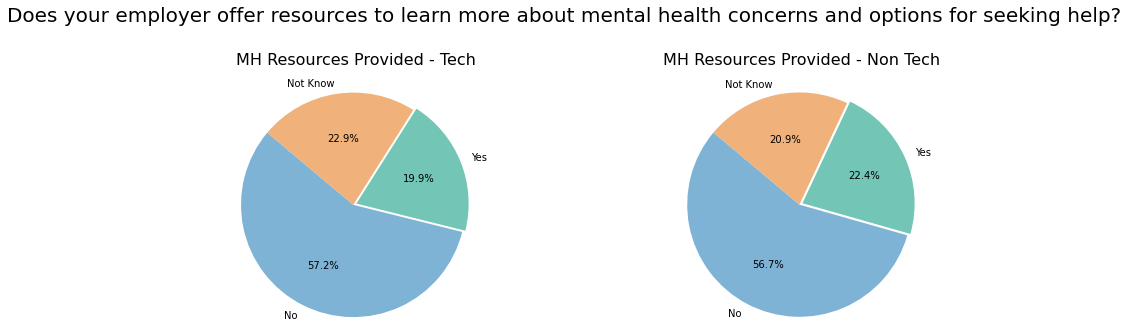

In [46]:
fig, ax = plt.subplots(figsize = (16, 10), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Does your employer offer resources to learn more about mental health concerns and options for seeking help?', fontsize = 20, y = 1)

labels = 'No', 'Yes', 'Not Know'
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0.03, 0)

ax[0][0].pie(get_sizes_2(data_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('MH Resources Provided - Tech', pad = 14, fontsize = 16)

ax[0][1].pie(get_sizes_2(data_non_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('MH Resources Provided - Non Tech', pad = 14, fontsize = 16)
fig.delaxes(ax[1][0])
fig.delaxes(ax[1][1])

Through this, we can see that both companies offer few resources to learn more about mental health concerns and options for seeking help. Only about a quarter of the responses answered "Yes".

In [34]:
def get_sizes_3(data):
    all_ = data['mh_medical_leave'].count()
    v_easy = data[data['mh_medical_leave'] == 'Very easy']['mh_medical_leave'].count()
    s_easy= data[data['mh_medical_leave'] == 'Somewhat easy']['mh_medical_leave'].count()
    middle= data[data['mh_medical_leave'] == 'Neither easy nor difficult']['mh_medical_leave'].count()
    v_hard = data[data['mh_medical_leave'] == "Very difficult"]['mh_medical_leave'].count()
    s_hard = data[data['mh_medical_leave'] == "Somewhat difficult"]['mh_medical_leave'].count()
    d_know = data[data['mh_medical_leave'] == "I don't know"]['mh_medical_leave'].count()
    return [v_easy/all_, s_easy/all_, middle/all_,v_hard/all_,s_hard/all_,d_know/all_]

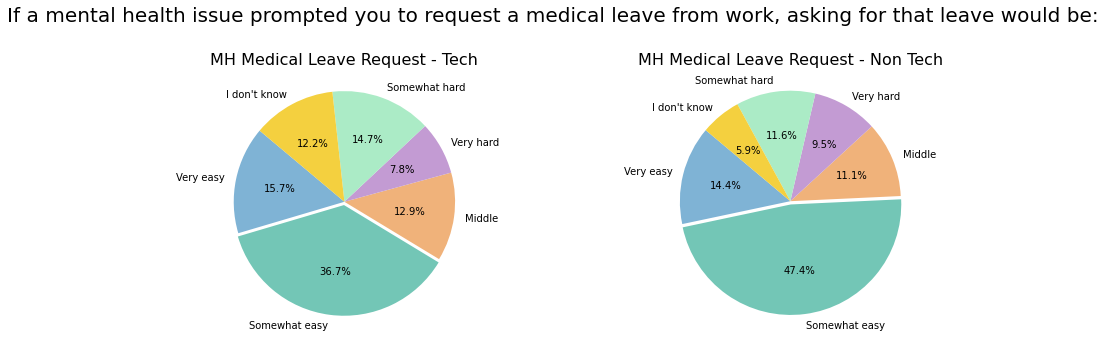

In [47]:
fig, ax = plt.subplots(figsize = (16, 10), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', fontsize = 20, y = 1)

labels = 'Very easy','Somewhat easy','Middle',"Very hard","Somewhat hard","I don't know"
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
explode = (0, 0.03, 0,0,0,0)

ax[0][0].pie(get_sizes_3(data_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('MH Medical Leave Request - Tech', pad = 14, fontsize = 16)

ax[0][1].pie(get_sizes_3(data_non_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('MH Medical Leave Request - Non Tech', pad = 14, fontsize = 16)
fig.delaxes(ax[1][0])
fig.delaxes(ax[1][1])

We can see that non-tech companies have about 60% of employees who choose "Yes" while tech companies have only about 50% of employees who choose "Yes". This shows that non-tech companies are more willing to give employees time off to treat psychological problems.

In [36]:
def get_sizes_4(data):
    all_ = data['mh_eq_ph_employer'].count()
    no_ = data[data['mh_eq_ph_employer'] == 'No']['mh_eq_ph_employer'].count()
    yes_ = data[data['mh_eq_ph_employer'] == 'Yes']['mh_eq_ph_employer'].count()
    not_know_ = data[data['mh_eq_ph_employer'] == "I don't know"]['mh_eq_ph_employer'].count()
    return [no_/all_, yes_/all_, not_know_/all_]

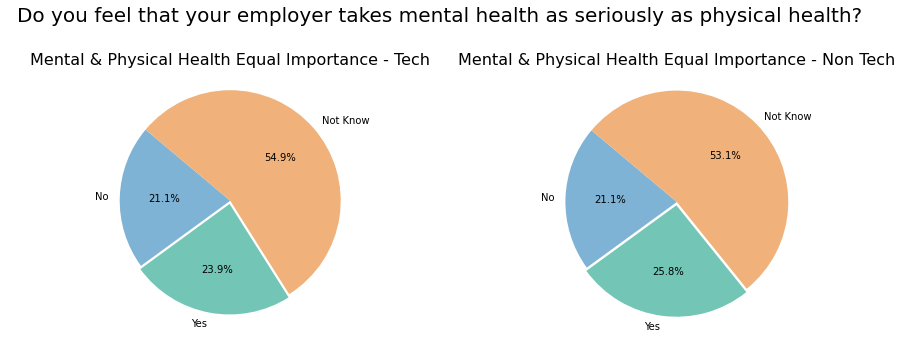

In [48]:
fig, ax = plt.subplots(figsize = (16, 10), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Do you feel that your employer takes mental health as seriously as physical health?', fontsize = 20, y = 1)

labels = 'No', 'Yes', 'Not Know'
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0.03, 0)

ax[0][0].pie(get_sizes_4(data_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('Mental & Physical Health Equal Importance - Tech', pad = 14, fontsize = 16)

ax[0][1].pie(get_sizes_4(data_non_tech), explode=explode, labels=labels
             , colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('Mental & Physical Health Equal Importance - Non Tech', pad = 14, fontsize = 16)
fig.delaxes(ax[1][0])
fig.delaxes(ax[1][1])

- Both companies balance psychological health as well as physical health. But most of the responses answered "not know", so we can't draw a conclusion.
- Through the above comments, to have the choice of a company that we will feel most comfortable asking for help, the best choice is a non-technology company.

***3. Do the most tech respondents among different gender and ages currently have a mental health disorder?***

We can see in the plots below, the number of `Male` which **DO NOT HAVE** metal health disorder is more than the **DO HAVE** one. Oppositely with the `Female` and `Genderqueer/ Other` one, the **DO HAVE** mental health disorder respondents is obviously more than the **DO NOT HAVE**.

We think this insight make sense, because there are many many problems which cause the mental health problems for `Female` and `Genderqueer/ Other` group, like Gender Discrimination, ...

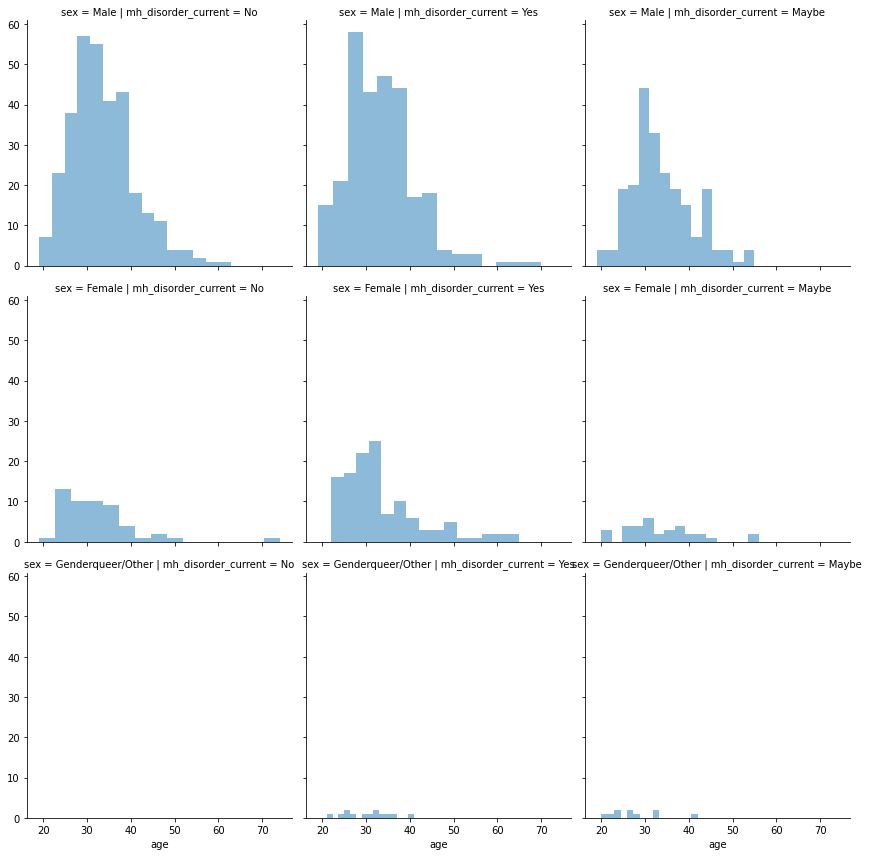

In [38]:
sns.FacetGrid(data_tech, row='sex', col='mh_disorder_current', height=4).map(plt.hist, 'age', alpha=0.5, bins=15);

***4. Do the tech employees mention or discuss about their mental health / mental health issues at work / friends / family?***

We use different questions from discussion in work and open these mental issues to friends/ family.
Therefore, we decide to choose these questions to go deeper and answer this question.
- Do you think that discussing a mental health disorder with your employer would have negative consequences?
- Would you feel comfortable discussing a mental health disorder with your coworkers?
- Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
- Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?

In [39]:
def get_sizes_5(data, col):
    all_ = data[col].count()
    no_ = data[data[col] == 'No'][col].count()
    yes_ = data[data[col] == 'Yes'][col].count()
    maybe_ = data[data[col] == 'Maybe'][col].count()
    return [no_/all_, yes_/all_, maybe_/all_]

In [40]:
labels_3 = 'No', 'Yes', 'Maybe'
mh_discussion_neg_impact_sizes = get_sizes_5(data_tech, 'mh_discussion_neg_impact')
mh_discussion_cowork_sizes = get_sizes_5(data_tech, 'mh_discussion_cowork')
mh_discussion_supervis_sizes = get_sizes_5(data_tech, 'mh_discussion_supervis')

In [41]:
def get_sizes_6():
    all_ = data_tech['mh_neg_view_cowork'].count()
    no_t = data_tech[data_tech['mh_neg_view_cowork'] == "No, I don't think they would"]['mh_neg_view_cowork'].count()
    no_ = data_tech[data_tech['mh_neg_view_cowork'] == "No, they do not"]['mh_neg_view_cowork'].count()
    maybe_ = data_tech[data_tech['mh_neg_view_cowork'] == 'Maybe']['mh_neg_view_cowork'].count()
    yes_t = data_tech[data_tech['mh_neg_view_cowork'] == 'Yes, I think they would']['mh_neg_view_cowork'].count()
    yes_ = data_tech[data_tech['mh_neg_view_cowork'] == 'Yes, they do']['mh_neg_view_cowork'].count()
    return [no_t/all_, no_/all_, maybe_/all_, yes_t/all_, yes_/all_]

In [42]:
mh_neg_view_cowork_labels = 'I think no', 'They do not', 'Maybe', 'I think yes', 'They do'
mh_neg_view_cowork_sizes = get_sizes_6()

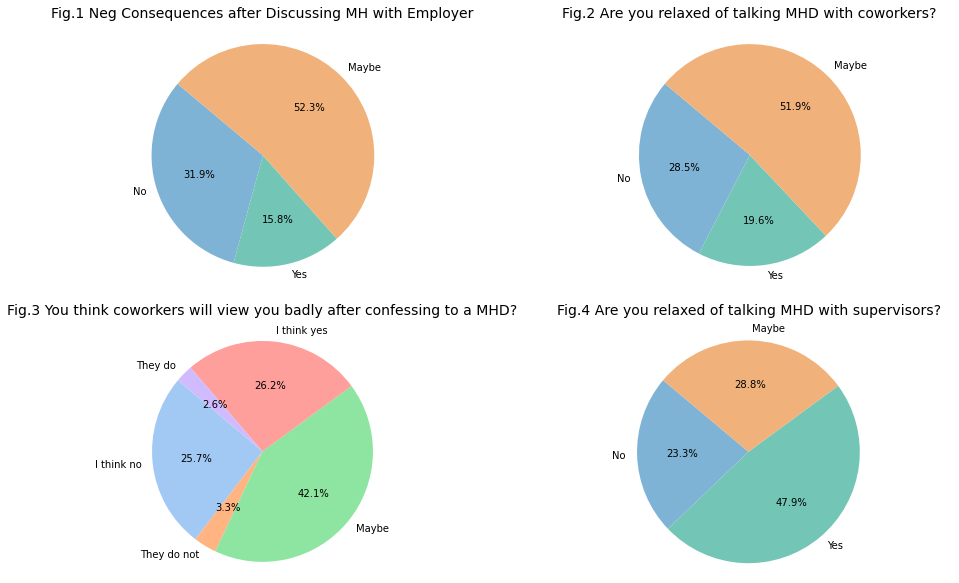

In [43]:
fig, ax = plt.subplots(figsize = (16, 10), ncols=2, nrows=2)

ax[0][0].pie(mh_discussion_neg_impact_sizes, labels=labels_3, colors=colors
             , autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('Fig.1 Neg Consequences after Discussing MH with Employer', pad = 14, fontsize = 14)

ax[0][1].pie(mh_discussion_cowork_sizes, labels=labels_3, colors=colors
             , autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('Fig.2 Are you relaxed of talking MHD with coworkers?', pad = 14, fontsize = 14)

ax[1][0].pie(mh_neg_view_cowork_sizes, labels=mh_neg_view_cowork_labels, colors=sns.color_palette('pastel')[0:5]
             , autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][0].axis('equal')
ax[1][0].set_title('Fig.3 You think coworkers will view you badly after confessing to a MHD?', pad = 14, fontsize = 14)

ax[1][1].pie(mh_discussion_supervis_sizes, labels=labels_3, colors=colors
             , autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][1].axis('equal')
ax[1][1].set_title('Fig.4 Are you relaxed of talking MHD with supervisors?', pad = 14, fontsize = 14);

There are actual concern when mentioning the mental health problem to other people in the company.

We can see that the `negative view` in the *Fig.3*, mostly the answers tend to the `yes`. However, in *Fig.2* and *Fig.4*, we can see that people are open to their coworkers/ supervisors, that is definitely a bright thing nowadays.

Luckily, the working environment is open about discussing any mental health problem without any jugdements. Perspectively, we think that is great to see the companies encourage this sharing and not let those issues effect the working.

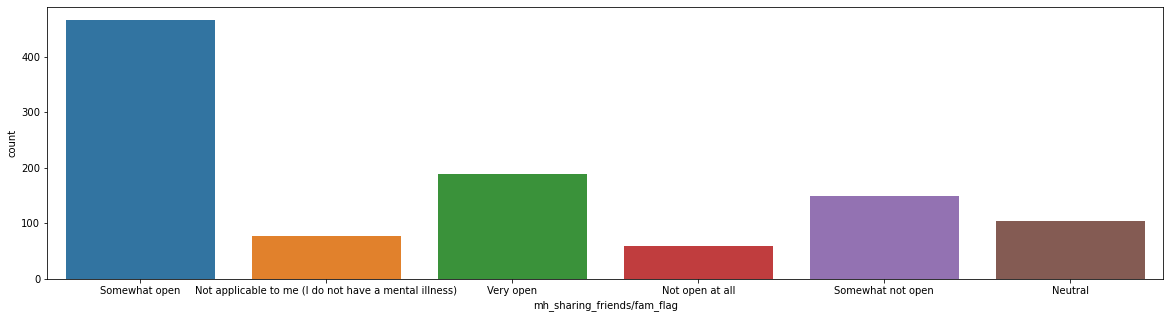

In [44]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.countplot(x="mh_sharing_friends/fam_flag", data=data_tech);

We think it is really important to receive advices and non-judgementally listen from friends and family. Fortunately, we can see it in the plot, the `open` range is obviously more than the `not open`. 

In the tech industry, it really appreciates to hear the respondents like this. And this is positively what we are expecting through out the project.

## Reflection

1. Difficulties

*Each member: What difficulties have you encountered?*

    * Hoàn Mỹ
- Confused when there are so many attributes to work on --> it's hard to get the insights.
- Struggle to answer the question properly.
- Get connected during the project.
    * Quốc Phát
- Because this is a fairly large and quite complex data, it is very time-consuming to be able to review and understand all the data.
2. Experiences

*Each member: What have you learned?*

    * Hoàn Mỹ
- Be active while doing in a group.
- Undetstand the data science process from finding data to answer the questions and give the meaningful insights.
    * Quốc Phát
- Understand data and be able to answer questions, as well as steps to visualize a data
3. Expansion

- Find and ask more questions which are more related to each other.
- Building a ML model to predict or giving deeper insights for this dataset
*Your group: If you had more time, what would you do?*

## References

- [Data Visualization with Python Seaborn](https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn)
- [Model and Visualize Mental Health in Tech](https://www.kaggle.com/andradaolteanu/model-and-visualize-mental-health-in-tech)